# *Segmentation of Graffiti Letters*
My final project revolves around graffiti using a machine learning model. Here I explored the task of segmenting graffiti through other methods. They would prove unsuccesful to adequately segment an image. This file is optional

In [58]:
#from project_2.segmentation import kmeans_fast, color_features
from PIL import Image
import random
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import canny
import scipy.ndimage as nd
from skimage import segmentation
from skimage.filters import rank
from skimage.morphology import disk

random.seed(10)

### Kmeans Clustering Segmentation
Here I attempted to segment the letters through clustering. I had to remove project_2.segmentation import kmeans_fast, color_features as it was part of the course's assignments.


Run color kmeans to produce 2 segments. We see that this isn't sufficent as it picks up other parts of the image.

(-0.5, 301.5, 849.5, -0.5)

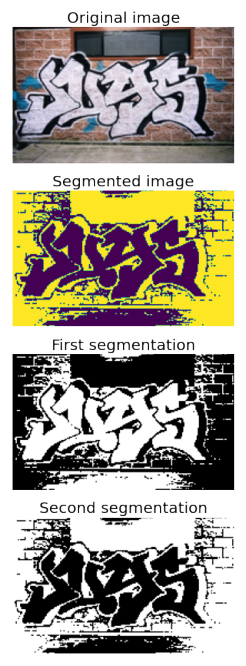

In [49]:
# img_path = "data/graf_pic_2.jpeg"
# img = Image.open(img_path)
# W, H = img.size

# # scale iamge to 500 pix width
# new_width = 200
# new_height = int(new_width * H / W)
# img = img.resize((new_width, new_height), Image.LANCZOS)


# # Extract pixel-level features
# img = np.asarray(img)
# H, W, C = img.shape
# num_segments = 2
# features = color_features(img)

# # Run clustering algorithm
# assignments = kmeans_fast(features, num_segments)

# segments = assignments.reshape((H, W))

# # Display segmentation
# N = num_segments + 2
# fig, axes = plt.subplots(N, 1, figsize=(10, 15))
# axes[0].imshow(img)
# axes[0].axis('off')
# axes[0].set_title("Original image", fontsize=20)

# axes[1].imshow(segments, cmap="viridis")
# axes[1].axis('off')
# axes[1].set_title("Segmented image", fontsize=20)

# # turn non part segments to 0 (black)
# segment1 = np.where(segments != 0, 0, 1)
# axes[2].imshow(segment1, cmap="gray")
# axes[2].axis('off')
# axes[2].set_title("First segmentation", fontsize=20)

# segment2 = np.where(segments != 1, 0, 1)
# axes[3].imshow(segment2, cmap="gray")
# axes[3].axis('off')
# axes[3].set_title("Second segmentation", fontsize=20)

# plt.show()

#Running the above code would have produced this (once again, can't run it as code isn't available as its part of a course assignment):
img = Image.open("project_2_color_kmeans_2segs.png")
plt.figure(figsize=(20,12))
plt.imshow(img)
plt.axis('off')


Run color position kmeans to produce 2 segments. We see that this isn't sufficent as it picks up other parts of the image.

(-0.5, 348.5, 240.5, -0.5)

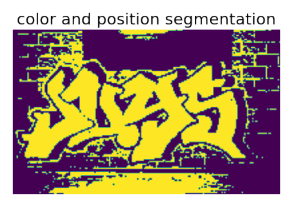

In [50]:
# Segment based off color and position.
# from project_2.segmentation import color_position_features
# b_segment = segment1
# b_segment = np.reshape(b_segment, (b_segment.shape[0], b_segment.shape[1], 1))
# H, W, C = b_segment.shape
# num_segments = 2
# features = color_position_features(b_segment)

# # Run clustering algorithm
# assignments = kmeans_fast(features, num_segments)

# segments = assignments.reshape((H, W))

# plt.imshow(segments, cmap='viridis')
# plt.axis('off')
# plt.title("color and position segmentation", fontsize=20)
# plt.show()

#Running the above code would have produced this (once again, can't run it as code isn't available as its part of a course assignment):
img = Image.open("project_2_color_pos_kmeans_2segs.png")
plt.figure(figsize=(5,6))
plt.imshow(img)
plt.axis('off')

Run color kmeans to produce 2 segments on black and white. We see that this fails

(-0.5, 348.5, 237.5, -0.5)

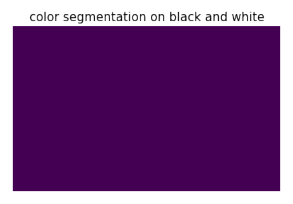

In [51]:
# Just color would fail as it is a black and white image
# features = color_features(b_segment)

# # Run clustering algorithm
# assignments = kmeans_fast(features, num_segments)

# segments = assignments.reshape((H, W))

# plt.imshow(segments, cmap='viridis')
# plt.axis('off')
# plt.title("color segmentation on black and white", fontsize=15)
# plt.show()

#Running the above code would have produced this (once again, can't run it as code isn't available as its part of a course assignment):
img = Image.open("project_2_color_black_white_kmeans_2segs.png")
plt.figure(figsize=(5,6))
plt.imshow(img)
plt.axis('off')

### Edge and Region Segmentation

I would then attempt to use the edges to segment the image and fill the holes as to segment. This would also fail as the edges aren't perfectly drawn and connected.

(-0.5, 734.5, 453.5, -0.5)

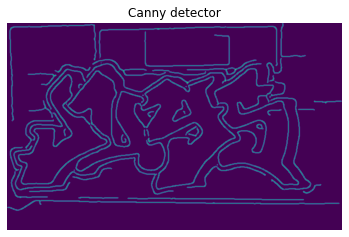

In [55]:
img_path = "data/graf_pic_2.jpeg"

img = io.imread(img_path, as_gray=True)

# get edges
edges = canny(img, sigma=4)
plt.imshow(edges, interpolation='gaussian')
plt.title('Canny detector')
plt.axis('off')

(-0.5, 734.5, 453.5, -0.5)

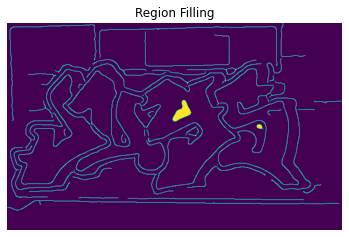

In [57]:
# fill 'holes'
fill_im = nd.binary_fill_holes(edges)
plt.imshow(fill_im)
plt.title('Region Filling')
plt.axis('off')

### Watershed Segmentation

I would then use watershed segmentation. This would prove succesfull for segmenting the letters out of the graffiti. But requires user input and oversight. It also fails in segementing into two parts, so I segmented out the letters 

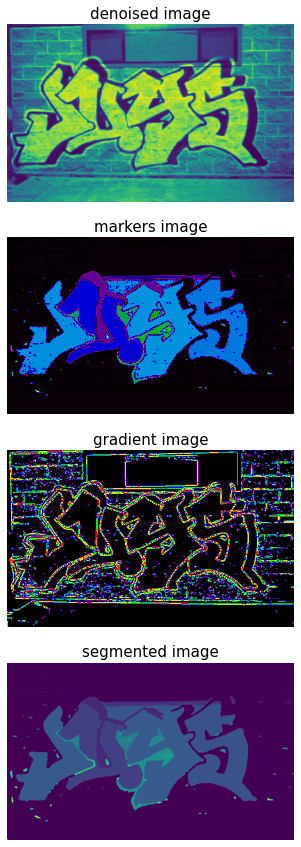

In [65]:
denoised = rank.median(img)
markers = rank.gradient(denoised, disk(1)) < 40
markers = nd.label(markers)[0]
gradient = rank.gradient(denoised, disk(1)) > 40

segmentation_letters = segmentation.watershed(gradient, markers)

fig, axes = plt.subplots(4, 1, figsize=(10, 15))
axes[0].imshow(denoised)
axes[0].set_title('denoised image', fontsize=15)
axes[0].axis('off')

axes[1].imshow(markers, cmap=plt.cm.nipy_spectral)
axes[1].set_title('markers image', fontsize=15)
axes[1].axis('off')

# turn non part segments to 0 (black)
axes[2].imshow(gradient, cmap=plt.cm.nipy_spectral)
axes[2].set_title('gradient image', fontsize=15)
axes[2].axis('off')

axes[3].imshow(segmentation_letters, cmap="viridis")
axes[3].set_title('segmented image', fontsize=15)
axes[3].axis('off')

plt.show()


In [67]:
#Get the 5 biggest masks. The first one is the background, but the following are the letters/
unique_values, counts = np.unique(segmentation_letters.flatten(), return_counts=True)
sorted_indices = np.argsort(-counts)
for i in range(5):  # Change 5 to the number of top values you want
    print(f"Value: {unique_values[sorted_indices[i]]}, Count: {counts[sorted_indices[i]]}")

Value: 1, Count: 226069
Value: 63, Count: 26145
Value: 55, Count: 22436
Value: 42, Count: 20179
Value: 62, Count: 17198


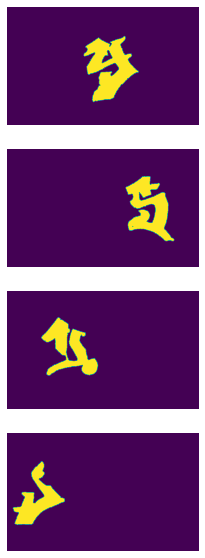

In [68]:
# plot segmented letters
fig, axes = plt.subplots(4, 1, figsize=(15, 10))
unique_segment_3 = np.where(segmentation_letters != 62, 0, 1)
axes[3].imshow(unique_segment_3)
axes[3].axis('off')

unique_segment_0 = np.where(segmentation_letters != 63, 0, 1)
axes[0].imshow(unique_segment_0)
axes[0].axis('off')

unique_segment_1 = np.where(segmentation_letters != 55, 0, 1)
axes[1].imshow(unique_segment_1)
axes[1].axis('off')

unique_segment_2 = np.where(segmentation_letters != 42, 0, 1)
axes[2].imshow(unique_segment_2)
axes[2].axis('off')

plt.show()